In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


# **🚗 Uber Ride Analytics Dataset 2024**
This comprehensive dataset contains detailed ride-sharing data from Uber operations for the year 2024, providing rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.

# **Dataset Overview**


The dataset captures 148,770 total bookings across multiple vehicle types and provides a complete view of ride-sharing operations including successful rides, cancellations, customer behaviors, and financial metrics.
**Key Statistics:**
Total Bookings: 148.77K rides
Success Rate: 65.96% (93K completed rides)
Cancellation Rate: 25% (37.43K cancelled bookings)
Customer Cancellations: 19.15% (27K rides)
Driver Cancellations: 7.45% (10.5K rides)

**📋 Data Schema**
The dataset contains the following columns:

**Column Name	Description**
Date	Date of the booking
Time	Time of the booking
Booking ID	Unique identifier for each ride booking
Booking Status	Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.)
Customer ID	Unique identifier for customers
Vehicle Type	Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan)
Pickup Location	Starting location of the ride
Drop Location	Destination location of the ride
Avg VTAT	Average Vehicle Time at Arrival
Avg CTAT	Average Customer Time at Arrival
Cancelled Rides by Customer	Customer-initiated cancellation flag
Reason for cancelling by Customer	Reason for customer cancellation
Cancelled Rides by Driver	Driver-initiated cancellation flag
Driver Cancellation Reason	Reason for driver cancellation
Incomplete Rides	Incomplete ride flag
Incomplete Rides Reason	Reason for incomplete rides
Booking Value	Total fare amount for the ride
Ride Distance	Distance covered during the ride (in km)
Driver Ratings	Rating given to driver (1-5 scale)
Customer Rating	Rating given by customer (1-5 scale)
Payment Method	Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card)

**🚗 Vehicle Fleet Coverage**
Vehicle Type	Total Bookings	Success Rate	Avg Distance	Total Distance
Auto	12.88M	91.1%	25.99 km	602K km
eBike/Bike	11.46M	91.1%	26.11 km	537K km
Go Mini	10.34M	91.0%	25.99 km	482K km
Go Sedan	9.37M	91.1%	25.98 km	433K km
Premier Sedan	6.28M	91.2%	25.95 km	292K km
UberXL	1.53M	92.2%	25.72 km	72K km


In [3]:
# lOAD THE DATASET
uber_df = pd.read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")

In [4]:
#EXPLORING THE DATA
uber_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
num_cols = uber_df.select_dtypes(include='number').columns
uber_df[num_cols] = uber_df[num_cols].replace([np.inf, -np.inf], np.nan)
uber_df[num_cols] = uber_df[num_cols].fillna(0)


In [6]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Avg CTAT                           150000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  float64
 11  Reason for cancelling by Customer  1050

In [6]:
uber_df.shape

(150000, 21)

In [7]:
# data statistics
uber_df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,7.864407,19.821753,0.070000,0.180000,0.060000,345.641220,16.753168,2.623215,2.730842
std,4.230640,15.452834,0.255148,0.384189,0.237488,403.423487,16.291118,2.082283,2.165548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.800000,22.000000,0.000000,0.000000,0.000000,244.000000,13.060000,3.900000,4.100000
75%,11.000000,32.900000,0.000000,0.000000,0.000000,521.000000,30.650000,4.300000,4.600000
max,20.000000,45.000000,1.000000,1.000000,1.000000,4277.000000,50.000000,5.000000,5.000000


In [8]:
uber_df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                                  0
Avg CTAT                                  0
Cancelled Rides by Customer               0
Reason for cancelling by Customer    139500
Cancelled Rides by Driver                 0
Driver Cancellation Reason           123000
Incomplete Rides                          0
Incomplete Rides Reason              141000
Booking Value                             0
Ride Distance                             0
Driver Ratings                            0
Customer Rating                           0
Payment Method                        48000
dtype: int64

# **Daily and Weekly Booking Trends Analysis for Uber Rides**

The data is examined at both daily and weekly levels to better understand demand patterns. The daily trend shows fluctuations in ride bookings from day to day, which could be linked to factors such as weekdays versus weekends, local events, or varying customer demand. On the other hand, aggregating the data into weekly totals smooths out these daily variations and reveals a more stable upward trajectory. For example, bookings rose from 2,836 in the first week of January to nearly 3,000 by the last week, suggesting consistent growth in ride demand throughout the month. This dual view provides both granular insights into short-term changes and a clearer picture of long-term trends.

In [9]:
# Analyze Booking Over time
uber_df['Date'] = pd.to_datetime(uber_df['Date'])

# dauily bookings
daily_bookings = uber_df.groupby('Date')['Booking ID'].count().reset_index()
daily_bookings.head()
                                 
                                 

,Date,Booking ID
0,2024-01-01,414
1,2024-01-02,389
2,2024-01-03,384
3,2024-01-04,414
4,2024-01-05,416


In [10]:
# weekly bookings
# Weekly booking trend
weekly_bookings = uber_df.resample('W-Mon', on='Date')['Booking ID'].count().reset_index()
print(weekly_bookings.head())

        Date  Booking ID
0 2024-01-01         414
1 2024-01-08        2836
2 2024-01-15        2922
3 2024-01-22        2971
4 2024-01-29        2910


# **Most Common Pickup & Drop Locations**

The analysis of Uber ride data shows the most frequent pickup and drop locations in the dataset. For pickups, Khandsa, Barakhamba Road, and Saket are the top three locations, each with over 900 rides, indicating high demand in these areas. Other notable pickup points include Badarpur, Pragati Maidan, and AIIMS. On the drop side, Ashram, Basai Dhankot, and Lok Kalyan Marg are the most common destinations, with ride counts also exceeding 900. These patterns suggest that certain areas consistently generate higher ride activity, which could help in planning driver availability, optimizing service coverage, and targeting promotions in high-demand zones.

In [11]:
top_pickups = uber_df['Pickup Location'].value_counts().head(10)
print(top_pickups)

top_drops = uber_df['Drop Location'].value_counts().head(10)
print(top_drops)

Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: count, dtype: int64
Drop Location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Nehru Place           902
Name: count, dtype: int64


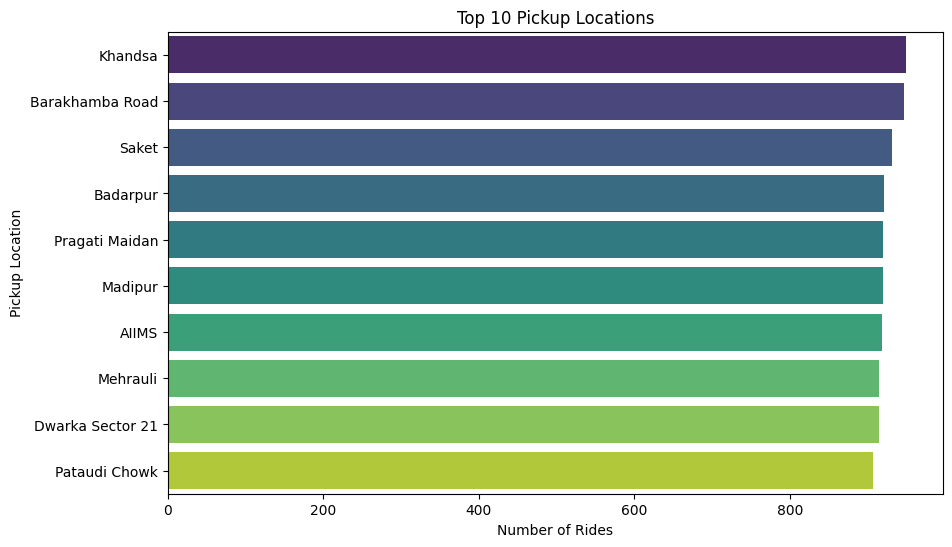

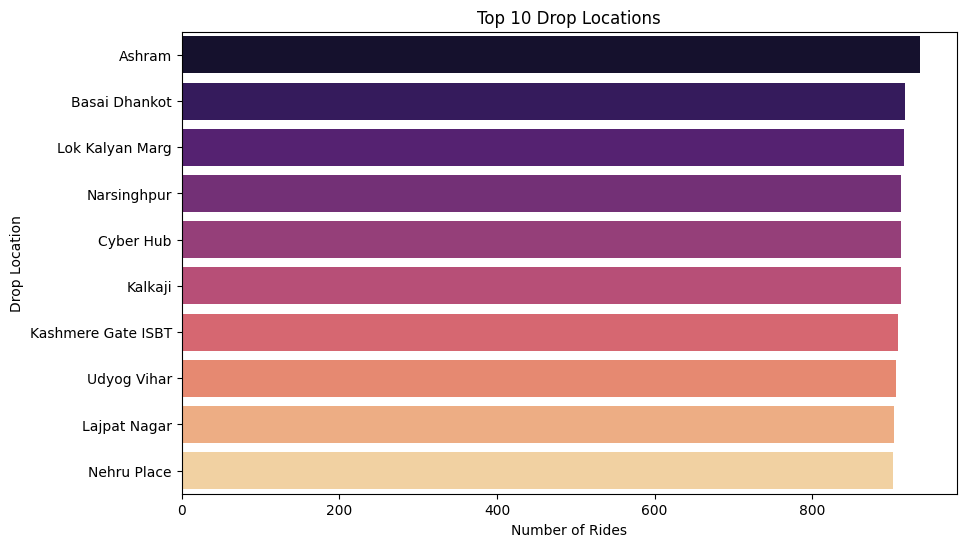

In [12]:
# Top 10 pickup locations
top_pickups = uber_df['Pickup Location'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_pickups.values, y=top_pickups.index, palette="viridis")
plt.title("Top 10 Pickup Locations")
plt.xlabel("Number of Rides")
plt.ylabel("Pickup Location")
plt.show()

# Top 10 drop locations
top_drops = uber_df['Drop Location'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_drops.values, y=top_drops.index, palette="magma")
plt.title("Top 10 Drop Locations")
plt.xlabel("Number of Rides")
plt.ylabel("Drop Location")
plt.show()

# **Vehicle Type Popularity**

The dataset shows that the majority of Uber rides are taken using Autos, with 37,419 bookings, followed by Go Mini and Go Sedan, which have 29,806 and 27,141 rides respectively. Bikes and Premier Sedans also contribute a significant number of rides, while eBikes and Uber XL are the least used options. This distribution indicates a strong preference for smaller, more economical vehicles among customers, likely due to affordability and convenience in traffic-heavy areas. Understanding these preferences can help optimize fleet allocation, ensuring that popular vehicle types are sufficiently available to meet demand.

In [13]:
vehicle_counts = uber_df['Vehicle Type'].value_counts().head(10)
print(vehicle_counts)

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64


# **Cancellation Analysis**

The cancellation data reveals that customers canceled a total of 10,500 rides, while drivers canceled 27,000 rides, indicating that driver-initiated cancellations are more frequent. Among customers, the top reasons for canceling include wrong address, change of plans, and the driver not moving toward the pickup location, each accounting for over 2,300 cancellations, with AC issues contributing to a smaller portion. On the driver side, cancellations are mostly due to customer-related issues, health concerns such as the customer being sick, personal or vehicle-related problems, and exceeding the permitted number of passengers. These insights highlight operational challenges and customer service issues that could be addressed to reduce cancellations and improve overall ride reliability.

In [18]:
customer_cancel_count = uber_df['Cancelled Rides by Customer'].sum()
print(F"Customer total Cancelation: {customer_cancel_count}")

# Driver cancellations
driver_cancel_count = uber_df['Cancelled Rides by Driver'].sum()
print(f"Total Driver Cancellations: {driver_cancel_count}")

# Most common customer cancellation reasons
cancel_reason_counts = uber_df['Reason for cancelling by Customer'].value_counts().head(5)
print(cancel_reason_counts)

# Most common driver cancellation reasons
driver_cancel_reasons = uber_df['Driver Cancellation Reason'].value_counts().head(5)
print(driver_cancel_reasons)

Customer total Cancelation: 10500.0
Total Driver Cancellations: 27000.0
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64


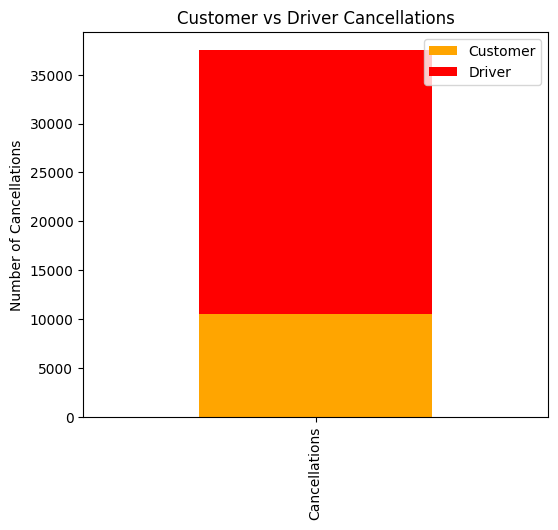

In [14]:
cancel_data = pd.DataFrame({
    'Customer': uber_df['Cancelled Rides by Customer'].sum(),
    'Driver': uber_df['Cancelled Rides by Driver'].sum()
}, index=['Cancellations'])

cancel_data.plot(kind='bar', stacked=True, color=['orange','red'], figsize=(6,5))
plt.title("Customer vs Driver Cancellations")
plt.ylabel("Number of Cancellations")
plt.show()


# **Revenue Analysis**

The total revenue generated from Uber rides in the dataset is 51,846,183. Among vehicle types, Autos contribute the highest revenue at 12,878,422, followed by Go Mini and Go Sedan, indicating that smaller, more economical vehicles dominate both ride volume and earnings. Bikes and Premier Sedans also contribute significant revenue, while eBikes and Uber XL generate comparatively less. In terms of payment methods, UPI is the most popular, accounting for 23,345,101 in revenue, followed by Cash at 12,895,649, and Uber Wallet at 6,200,898. Credit and Debit Cards contribute the remaining revenue. These insights show the dominance of affordable vehicle options and digital payments in generating revenue, providing guidance for fleet planning and payment strategy optimization.

In [15]:
# Total booking value
total_revenue = uber_df['Booking Value'].sum()
print(f"Total Revenue: {total_revenue}")

# Revenue by vehicle type
revenue_by_vehicle = uber_df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)
print(revenue_by_vehicle)

# Revenue by payment method
revenue_by_payment = uber_df.groupby('Payment Method')['Booking Value'].sum().sort_values(ascending=False)
print(revenue_by_payment)


Total Revenue: 51846183.0
Vehicle Type
Auto             12878422.0
Go Mini          10338496.0
Go Sedan          9369719.0
Bike              7837697.0
Premier Sedan     6275332.0
eBike             3618485.0
Uber XL           1528032.0
Name: Booking Value, dtype: float64
Payment Method
UPI            23345101.0
Cash           12895649.0
Uber Wallet     6200898.0
Credit Card     5224025.0
Debit Card      4180510.0
Name: Booking Value, dtype: float64


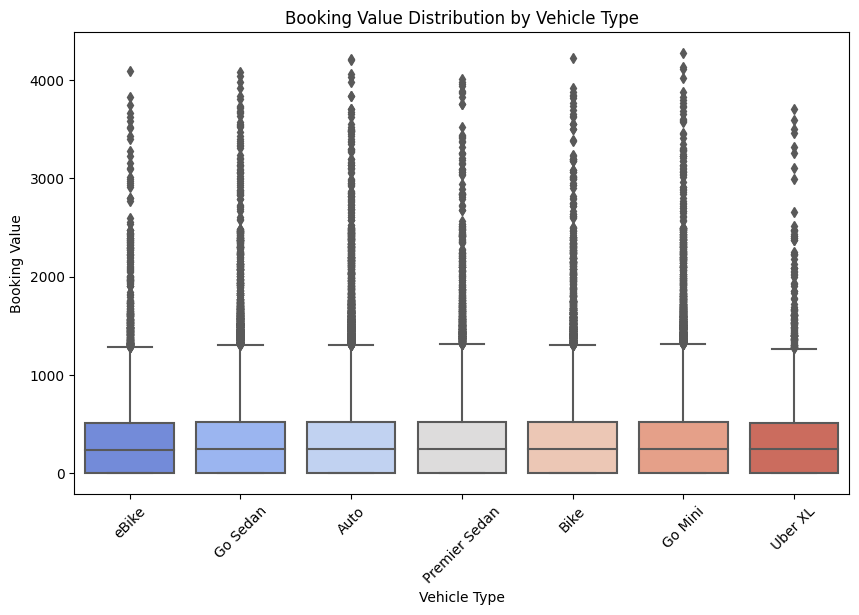

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Vehicle Type', y='Booking Value', data=uber_df, palette="coolwarm")
plt.title("Booking Value Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Booking Value")
plt.xticks(rotation=45)
plt.show()


# **Rating Analysis**

The analysis of ride ratings shows that both drivers and customers generally give similar feedback across vehicle types, with average ratings ranging around 2.6–2.75. Uber XL has the highest average ratings for both drivers (2.65) and customers (2.76), suggesting that premium rides tend to receive slightly better experiences. Among the more commonly used vehicles, Bikes and Go Mini also maintain solid ratings, while Go Sedan has slightly lower driver and customer ratings. Overall, the variation in ratings is relatively small, indicating generally consistent service quality across different vehicle types, though premium options may offer a marginally better experience for both drivers and passengers.

In [20]:
# Average driver rating per vehicle type
avg_driver_rating = uber_df.groupby('Vehicle Type')['Driver Ratings'].mean()
print(avg_driver_rating)

# Average customer rating per vehicle type
avg_customer_rating = uber_df.groupby('Vehicle Type')['Customer Rating'].mean()
print(avg_customer_rating)


Vehicle Type
Auto             2.619004
Bike             2.636435
Go Mini          2.630997
Go Sedan         2.600114
Premier Sedan    2.631036
Uber XL          2.651225
eBike            2.622146
Name: Driver Ratings, dtype: float64
Vehicle Type
Auto             2.723972
Bike             2.744811
Go Mini          2.740901
Go Sedan         2.709594
Premier Sedan    2.735779
Uber XL          2.755383
eBike            2.732812
Name: Customer Rating, dtype: float64


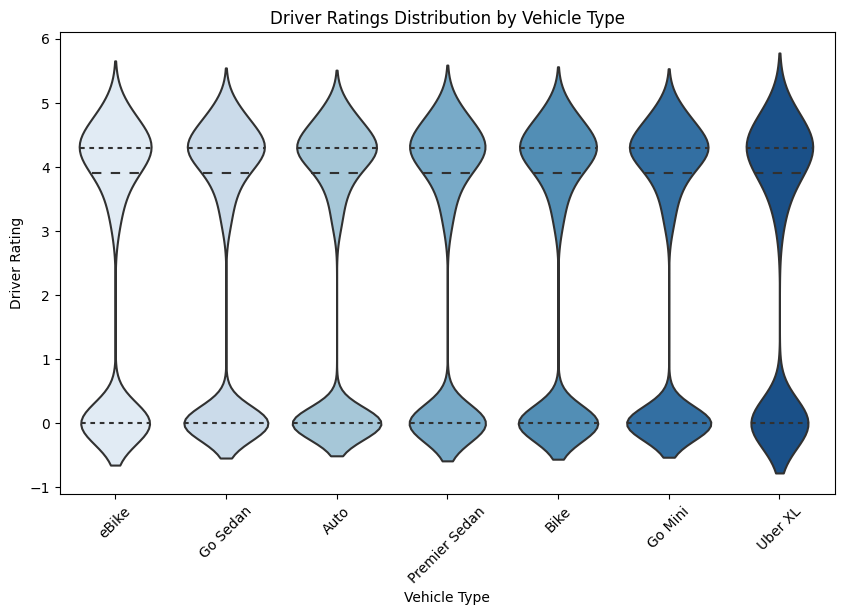

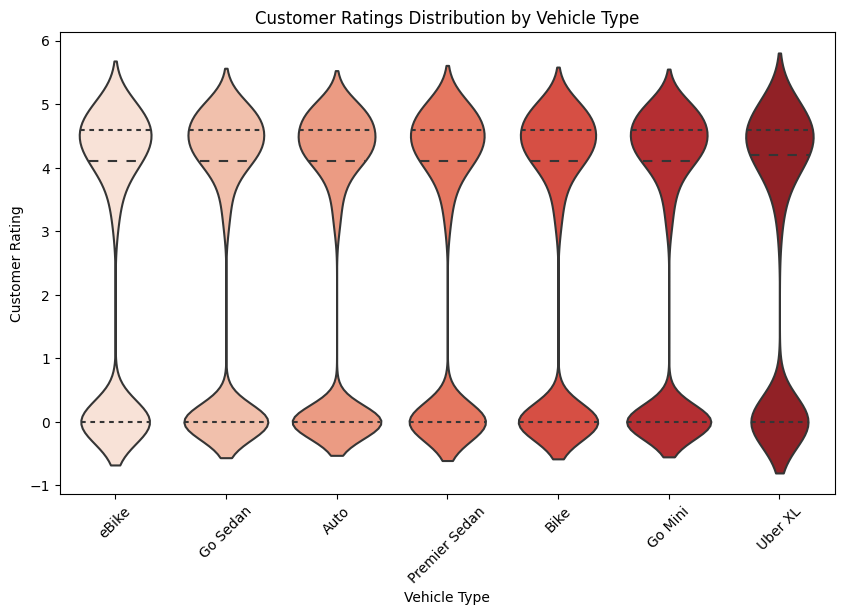

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Vehicle Type', y='Driver Ratings', data=uber_df, palette="Blues", inner="quartile")
plt.title("Driver Ratings Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Driver Rating")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='Vehicle Type', y='Customer Rating', data=uber_df, palette="Reds", inner="quartile")
plt.title("Customer Ratings Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Customer Rating")
plt.xticks(rotation=45)
plt.show()


# **Distance vs Value**


The correlation analysis between ride distance and booking value shows a positive relationship of approximately 0.42. This indicates that, in general, longer rides tend to have higher booking values, though the correlation is moderate rather than strong. While distance contributes to the fare, other factors such as vehicle type, surge pricing, and ride conditions may also influence the booking value. This insight helps in understanding pricing patterns and can be useful for revenue forecasting and fare optimization strategies.

In [17]:
# Correlation between ride distance and booking value
correlation = uber_df[['Ride Distance', 'Booking Value']].corr()
print(correlation)


               Ride Distance  Booking Value
Ride Distance       1.000000       0.417591
Booking Value       0.417591       1.000000


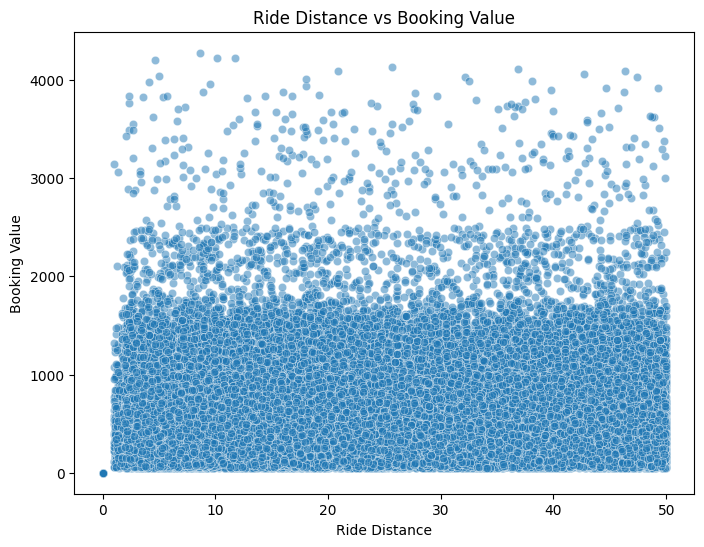

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Ride Distance', y='Booking Value', data=uber_df, alpha=0.5)
plt.title("Ride Distance vs Booking Value")
plt.xlabel("Ride Distance")
plt.ylabel("Booking Value")
plt.show()


# **Turnaround Time Effect**


The average Vehicle Turnaround Time (VTAT) and Customer Turnaround Time (CTAT) were analyzed across different vehicle types to understand operational efficiency. VTAT, which measures the time a vehicle takes between completing one ride and starting the next, is fairly consistent across vehicle types, ranging from approximately 7.79 minutes for Go Sedan to 7.97 minutes for Uber XL. This suggests that larger or premium vehicles may require slightly more time to prepare for the next ride, but overall vehicle readiness is comparable across the fleet.

For CTAT, which measures the total time a customer spends from booking to ride completion, the values are also quite similar across vehicle types, ranging from about 19.6 minutes for Go Sedan to nearly 19.99 minutes for Uber XL. This indicates that customers experience relatively uniform ride times regardless of the vehicle type, although premium options like Uber XL may have marginally longer turnaround times, potentially due to longer pickup or drop-off procedures. Overall, the data suggests that both VTAT and CTAT are well-managed across the fleet, with only slight variations by vehicle type.

In [18]:
# Average VTAT & CTAT by vehicle type
vtat_ctat_avg = uber_df.groupby('Vehicle Type')[['Avg VTAT', 'Avg CTAT']].mean()
print(vtat_ctat_avg)


               Avg VTAT   Avg CTAT
Vehicle Type                      
Auto           7.842994  19.793463
Bike           7.932669  19.920931
Go Mini        7.895625  19.922120
Go Sedan       7.794871  19.599819
Premier Sedan  7.842339  19.867970
Uber XL        7.968577  19.991908
eBike          7.879303  19.846689


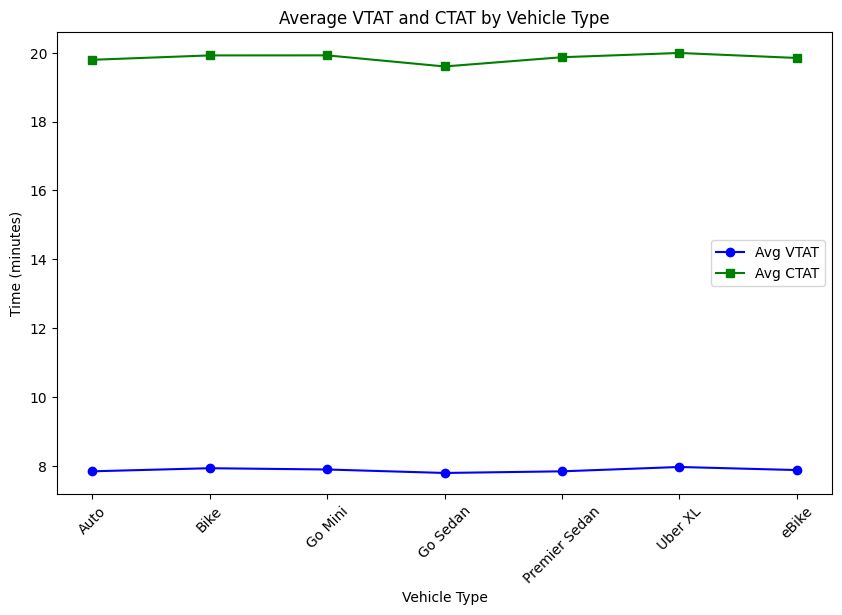

In [19]:
avg_vtat_ctat = uber_df.groupby('Vehicle Type')[['Avg VTAT', 'Avg CTAT']].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_vtat_ctat.index, avg_vtat_ctat['Avg VTAT'], marker='o', label='Avg VTAT', color='blue')
plt.plot(avg_vtat_ctat.index, avg_vtat_ctat['Avg CTAT'], marker='s', label='Avg CTAT', color='green')
plt.title("Average VTAT and CTAT by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Time (minutes)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# **Machine Learning**
**Predicting Booking Status** 

In [41]:
# drop irrevalant columsn
df = uber_df.drop(['Booking ID', 'Customer ID'], axis=1)

In [42]:
## extract time features
df['Date'] = pd.to_datetime(df['Date'])
df['Day of Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Hour'] = pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour

In [43]:
# drop original date and time
# Drop original date/time columns
df = df.drop(['Date', 'Time'], axis=1)

In [44]:
leakage_cols = [
    'Cancelled Rides by Customer',
    'Reason for cancelling by Customer',
    'Cancelled Rides by Driver',
    'Driver Cancellation Reason',
    'Incomplete Rides',
    'Incomplete Rides Reason'
]

df = df.drop(columns=leakage_cols)

In [45]:
# separate features and target
X = df.drop("Booking Status", axis =1)
y = df["Booking Status"]

In [46]:
# identify categorical and numerical columsn
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [47]:
# --- Preprocessing: OneHotEncoder for categorical ---

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [48]:
# Model pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [49]:
# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# --- Train ---
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [51]:
# --- Evaluate ---
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

Cancelled by Customer       0.99      0.53      0.70      2100
  Cancelled by Driver       0.85      1.00      0.92      5400
            Completed       1.00      1.00      1.00     18600
           Incomplete       1.00      1.00      1.00      1800
      No Driver Found       1.00      1.00      1.00      2100

             accuracy                           0.97     30000
            macro avg       0.97      0.91      0.92     30000
         weighted avg       0.97      0.97      0.96     30000



The model achieves an overall accuracy of 97%, meaning it correctly predicts the booking status for the vast majority of the 30,000 test cases. The class-by-class results show that “Completed,” “Incomplete,” and “No Driver Found” are predicted perfectly, with precision, recall, and F1-scores of 1.00. “Cancelled by Driver” also performs strongly, with high precision (0.85) and perfect recall (1.00), indicating that the model successfully identifies all true cancellations by drivers, though some predictions are incorrectly assigned to this class. However, “Cancelled by Customer” shows lower performance, with high precision (0.99) but a much lower recall (0.53), which suggests that while the model is almost always correct when predicting this class, it misses nearly half of the actual customer cancellations, likely classifying them as another outcome instead. Compared to the earlier perfect scores, these results are more realistic because data leakage is removed, meaning the model now relies only on features available at booking time. The slightly lower but still strong accuracy indicates the model is learning meaningful patterns and should generalize better to unseen data.